In [1]:
! pip install catboost
! pip install keras
!pip install tensorflow
import os
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import PIL
import tensorflow as tf
from tensorflow import keras

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

import keras
from keras.models import load_model, Model
from keras_applications.mobilenet import relu6

from keras.models import Sequential
from keras.layers import Dense, Dropout

import warnings

warnings.filterwarnings('ignore')

C:\Users\hussa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: No module named 'keras_applications'

In [2]:
data_df = pd.read_csv('card_transdata.csv')

In [3]:
data_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
data_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,fraud,online_order,used_pin_number,used_chip,repeat_retailer,ratio_to_median_purchase_price,distance_from_last_transaction,distance_from_home
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
data_df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
data_df.shape

(1000000, 8)

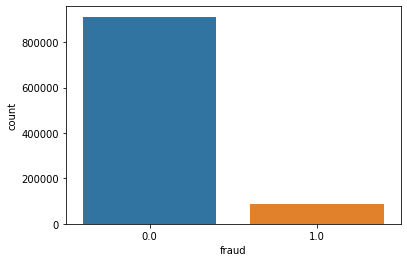

In [9]:
sns.countplot(data_df['fraud']);

In [10]:
x=data_df.drop("fraud", axis=1)

In [11]:
y=data_df["fraud"]

In [12]:
x


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [13]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
771718,1.292052,0.358029,3.763149,0.0,0.0,0.0,1.0
521462,8.897652,0.162344,0.698735,1.0,0.0,1.0,0.0
137361,5.064979,5.056912,2.455824,1.0,0.0,0.0,0.0
404985,4.108342,5.331897,0.581530,1.0,1.0,0.0,0.0
910092,1.388784,1.423223,0.195103,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
491263,0.288026,2.405389,1.680267,0.0,1.0,0.0,1.0
791624,3.946646,1.943544,1.142997,1.0,0.0,0.0,1.0
470924,24.593870,3.228268,0.320432,1.0,1.0,0.0,0.0
491755,3.712287,1.225731,0.786134,1.0,1.0,0.0,1.0


In [17]:
y_train

771718    0.0
521462    0.0
137361    0.0
404985    0.0
910092    0.0
         ... 
491263    0.0
791624    0.0
470924    0.0
491755    0.0
128037    0.0
Name: fraud, Length: 800000, dtype: float64

In [18]:
x_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
276826,2.760391,2.933077,2.835948,1.0,0.0,0.0,0.0
849425,5.283704,15.296824,0.668016,1.0,1.0,0.0,1.0
504499,0.659813,1.669643,0.743857,0.0,0.0,1.0,1.0
601054,1.980857,5.042472,0.588908,1.0,0.0,0.0,0.0
980221,42.296208,0.320519,4.080048,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
555867,42.389540,10.277335,0.316392,1.0,0.0,0.0,1.0
30004,5.115412,0.700690,7.109528,1.0,1.0,0.0,1.0
124730,20.207314,15.282132,0.744800,1.0,0.0,0.0,1.0
195783,3.051511,1.016972,1.931812,1.0,0.0,0.0,0.0


In [19]:
y_test

276826    0.0
849425    0.0
504499    0.0
601054    0.0
980221    1.0
         ... 
555867    0.0
30004     1.0
124730    0.0
195783    0.0
32132     0.0
Name: fraud, Length: 200000, dtype: float64

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc=DecisionTreeClassifier()

In [22]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred=dtc.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
from sklearn import metrics

In [26]:
accuracy_score(y_pred,y_test)

0.99997

In [27]:
confusion_matrix(y_pred,y_test)

array([[182382,      5],
       [     1,  17612]], dtype=int64)

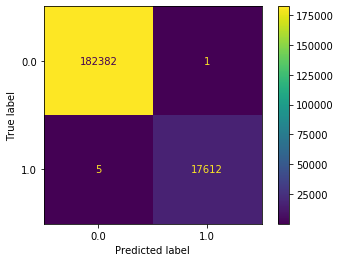

In [28]:
metrics.plot_confusion_matrix(dtc,x_test,y_test)

In [29]:
from sklearn.tree import plot_tree

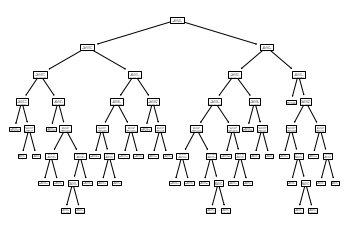

In [30]:
plot_tree(dtc)
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
x_train

array([[-3.83214538e-01, -1.74072845e-01,  6.97112567e-01, ...,
        -7.35265556e-01, -3.34651218e-01,  7.33400274e-01],
       [-2.68431017e-01, -1.81322195e-01, -4.03973749e-01, ...,
        -7.35265556e-01,  2.98818575e+00, -1.36351190e+00],
       [-3.26273625e-01,  2.07714331e-06,  2.27372618e-01, ...,
        -7.35265556e-01, -3.34651218e-01, -1.36351190e+00],
       ...,
       [-3.15441102e-02, -6.77418839e-02, -5.39902982e-01, ...,
         1.36005283e+00, -3.34651218e-01, -1.36351190e+00],
       [-3.46688408e-01, -1.41927929e-01, -3.72570025e-01, ...,
         1.36005283e+00, -3.34651218e-01,  7.33400274e-01],
       [-2.11495830e-01, -1.59383735e-01, -4.52505923e-01, ...,
         1.36005283e+00, -3.34651218e-01, -1.36351190e+00]])

In [34]:
x_test

array([[-0.36105441, -0.07867755,  0.36395629, ..., -0.73526556,
        -0.33465122, -1.3635119 ],
       [-0.32297263,  0.37935004, -0.41501127, ...,  1.36005283,
        -0.33465122,  0.73340027],
       [-0.39275627, -0.12548274, -0.38776049, ..., -0.73526556,
         2.98818575,  0.73340027],
       ...,
       [-0.0977459 ,  0.37880578, -0.3874218 , ..., -0.73526556,
        -0.33465122,  0.73340027],
       [-0.35666084, -0.14966161,  0.03908778, ..., -0.73526556,
        -0.33465122, -1.3635119 ],
       [-0.30887472,  0.09427187,  0.50614783, ...,  1.36005283,
        -0.33465122,  0.73340027]])

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [40]:
ANN= Sequential()

In [41]:
ANN.add(Dense(1, activation='sigmoid'))

In [42]:
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist=ANN.fit(x_train, y_train, epochs = 10,
           batch_size = 1, verbose = 1)

Epoch 1/10
258660/800000 [========>.....................] - ETA: 20:36 - loss: 0.1458 - accuracy: 0.9534

In [ ]:
y_pred =ANN.predict(x_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
sns.heatmap(cm,annot=True)